# 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?
##### !. VScode 플랫폼을 사용하여 가상환경 Python 3.9.7버전에서 작성되었습니다.


### (1) 데이터 가져오기
터미널에서 ~/data/data/bike-sharing-demand 경로에 train.csv 데이터를 train 변수로 가져 옵니다.  
(이 코드에서는 데이터 관리를 용이하게 하기 위해 직접 다운로드)

In [8]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [9]:
train = pd.read_csv("/Users/hpcd/Desktop/Code/LMS/[E-02]회귀,분류/train.csv")

In [10]:
# 데이터 구성 확인
train.head(5) #여기서 사용할 데이터는 datetime으로 2011-01-01 00:00:00 형태로 되어 있음.

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [11]:
# 속성확인
train.dtypes # datetime의 속성이 object임을 확인

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [12]:
train.shape

(10886, 12)

In [13]:
train.info

<bound method DataFrame.info of                   datetime  season  holiday  workingday  weather   temp  \
0      2011-01-01 00:00:00       1        0           0        1   9.84   
1      2011-01-01 01:00:00       1        0           0        1   9.02   
2      2011-01-01 02:00:00       1        0           0        1   9.02   
3      2011-01-01 03:00:00       1        0           0        1   9.84   
4      2011-01-01 04:00:00       1        0           0        1   9.84   
...                    ...     ...      ...         ...      ...    ...   
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  
0  

### (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기
to_datetime 활용 : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html#pandas.to_datetime  
pandas datetime extract year month day 키워드로 검색해 보기

In [14]:
#datetime 컬럼을 datetime 자료형으로 전환. pd.to_datetime() 
train['datetime'] = pd.to_datetime(train['datetime'], format='%Y-%m-%d %H:%M:%S', errors='raise')
#컬럼생성
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second



train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0


In [15]:
train.dtypes #datatime의 속성이 object -> datetiem64[ns]로 변경된 것을 확인할 수 있음.

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
year                   int64
month                  int64
day                    int64
hour                   int64
minute                 int64
second                 int64
dtype: object

### (3) year, month, day, hour, minute, second 데이터 개수 시각화하기
sns.countplot 활용해서 시각화하기  
subplot을 활용해서 한 번에 6개의 그래프 함께 시각화하기

<AxesSubplot:xlabel='second', ylabel='count'>

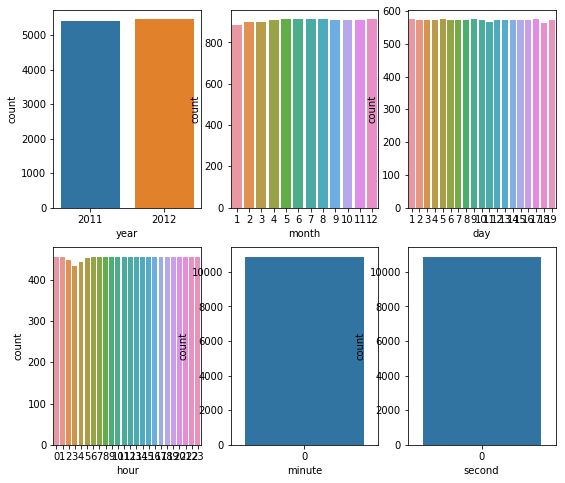

In [31]:
#data 개수 시각화
#plt.figure(figsize=(가로길이,세로길이)) # 단위 inch
plt.figure(figsize=(9,8))
plt.subplot(2,3,1)
sns.countplot(x="year", data=train)
plt.subplot(2,3,2)
sns.countplot(x="month", data=train)
plt.subplot(2,3,3)
sns.countplot(x="day", data=train)
plt.subplot(2,3,4)
sns.countplot(x="hour", data=train)
plt.subplot(2,3,5)
sns.countplot(x="minute", data=train)
plt.subplot(2,3,6)
sns.countplot(x="second", data=train)
#subplot

### (4) X, y 컬럼 선택 및 train/test 데이터 분리
X에는 문자열 데이터, 쓸모없는 데이터를 제외한 컬럼의 데이터 넣기  
count 값을 맞추고자 하므로, y 변수에 count 컬럼의 데이터 넣기


In [13]:
df_x = train[['weather','temp','humidity','windspeed','hour','season']].values
df_y = train["count"].values

#spilt
X_train, X_test,  y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state =8)

### (5) LinearRegression 모델 학습
sklearn의 LinearRegression 모델 불러오기 및 학습하기  

In [16]:
# from sklearn.linear_model import LinearRegression
# model init
model = LinearRegression()

In [17]:
# model fit training
model.fit(df_x, df_y)

LinearRegression()

### (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산
학습된 모델에 X_test를 입력해서 예측값 출력하기  
모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기  
mse 값과 함께 rmse 값도 계산하기  

In [18]:
# 학습된 모델로 예측값
predictions = model.predict(X_test)
predictions

array([ 83.65396594, 293.02345779, 217.01107298, ..., 416.77784775,
       341.60423382, 111.06999391])

In [20]:
#from sklearn.metrics import mean_squared_error
#손실 함수 계산 mse / rmse
mse = mean_squared_error(y_test, predictions)
print("mse", mse) # mse 22235.089245548414

rmse = mse ** 0.5
print("rmse", rmse) #rmse 149.11434956283856

mse 22235.089245548414
rmse 149.11434956283856


### (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기
x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기  
x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기  

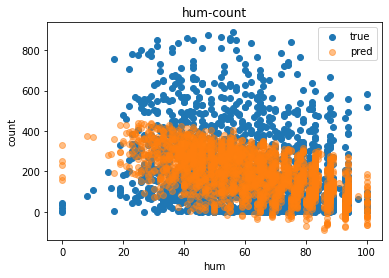

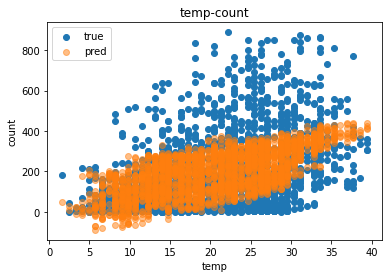

In [21]:
# 그래프로
# 온도

plt.title("hum-count")
plt.xlabel("hum")
plt.ylabel("count")
plt.scatter(X_test[:, 2], y_test, label="true") # x- y실제값
plt.scatter(X_test[:, 2], predictions, label="pred", alpha=0.5)# x-y예측값
plt.legend() # 범례
plt.show()

# 습도


plt.title("temp-count")
plt.xlabel("temp")
plt.ylabel("count")
plt.scatter(X_test[:, 1], y_test, label="true") # x- y실제값
plt.scatter(X_test[:, 1], predictions, label="pred", alpha=0.5)# x-y예측값
plt.legend() # 범례
plt.show()

### 회고록:

LinearRegression을 사용하여 분석을 위해 필요한 데이터들을 전처리 해보고 이를 통해 미래를 예측해보는 두번째 Explation이었다.  
수학적인 개념을 적용시킨다는 것 자체가 생소하게 느껴져 코드 작성 초기에는 막막함이 앞섰다.  
LMS에서 기능과 코드들을 친절하게 설명해주었기에 코드작성자체는 어렵지 않았지만, 코드를 실행 후 학습률과 테스트 데이터의 결과물들에서 적절한 값을 뽑아내는 기준을 선정하기 어려웠다.   
특히 초반에 학습률을 최대한 작게 잡았을 때는 MSE 손실함수 값이 2만까지 넘어가 놀라기도 했었다.  
이를 보완하기 계속해서 random_state등을 Learning_rate나 반복횟수등을 변경해보는 둥의 노력이 필요했다.   
다행히도 반복하던 와중 프로젝트가 요구하는 정확도를 뽑아낼 수 있었다.  
자전거 대여량을 예측하는 두번째 프로젝트는 시간을 분리하여 새로운 컬럼을 생성하는 부분에서부터 어려움이 느껴졌다.   
다행히도 어떻게 datetime을 사용해하는지에 대한 링크가 있어 여러번 코드를 쓰고 지우고를 반복해 원하는 결과를 뽑아낼 수 있었다.  
그래프를 만드는 과정에서도 subplot을 이용하여 데이터개수를 표현하고자 했을 때 어떻게 만들어야 할지 감이 잡히지 않아서 어려웠었다.  

추가적으로 linear 학습률과 loss함수에 대해 처음에는 어려웠지만 아이펠 진행중 노드와 풀잎스쿨에서 관련 개념들을 발표해보면서 이해할 수 있는 시간이 있어서 코드를 작성하는데 큰 도움이 되었다.   
배운 지식들을 연결해보는 과정이 중요함을 다시 한번 깨달았다.  

저번시간에 이어서 pandas와 numpy의 기능을 활용하고 있다. 이 부분은 지속적으로 study가 필요.  